In [472]:
## Importing Libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
from sklearn import svm
import openpyxl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from timeit import default_timer as timer
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime
from sklearn import *
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVR
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [473]:
## Declaring variables ##
df = pd.read_csv('mergedFiles.csv')

In [474]:
## Processing the data ## 
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')
df = df.dropna()

## Attribute selection ## 
df = df[['error_one','error_two','error_three','error_four','target','targetplus','maxdiff','The Pocket (Marshalls Creek)']]

In [475]:
## Creating the training and testing variable ##
training_data  = df[df.index<datetime(2017, 3, 1)]
testing_data   = df[df.index>datetime(2017, 3, 1)]

In [476]:
## Defining Y and X values ## 
X_train = training_data.drop(['targetplus'], axis=1) 
y_train = training_data['targetplus']

## Defining Y and X values ## 
X_test = testing_data.drop(['targetplus'], axis=1) 
y_test = testing_data['targetplus']

In [509]:
## Building and fittinh the model ##
from sklearn.tree import ExtraTreeRegressor

## Setting model ## 
LR = linear_model.TweedieRegressor(power=0,alpha=0.28)

## Fitting the training data ##
LR.fit(X_train,y_train) 

## Creating prediction ##
y_prediction = LR.predict(X_test) 
y_prediction[y_prediction < 0.0] = 0.0

## Calculating prediction and actual valus ##
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})

In [510]:
## Retrieving R2 Score, MSE, MAPE score ##
print("R2 Score is "  + str(r2_score(y_test, y_prediction)) +
      " ::: MSE Score is " + str(mean_absolute_error(y_test, y_prediction)) +
      " ::: MAPE Score is " + str(mean_absolute_percentage_error(y_test, y_prediction)))

R2 Score is 0.49244046780159223 ::: MSE Score is 0.0616812306803999 ::: MAPE Score is 0.0840532177567256


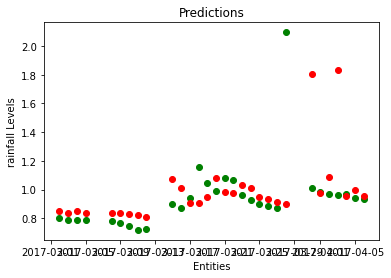

In [498]:
## Visualisation of predictions - Setting specifics for graph ##
fig = plt.figure()
ax1 = fig.add_subplot(111) 

## Visualisation of predictions - Creating graph ##
plt.title("Predictions")
plt.ylabel("rainfall Levels")
plt.xlabel("Entities")

## Plotting the graph ##
ax1.scatter(df1.index[0:30],df1.Actual[0:30].values,color='g')
ax1.scatter(df1.index[0:30],df1.Predicted[0:30].values, color='r')

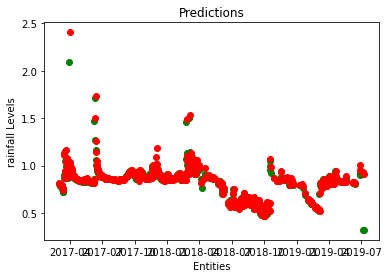

In [378]:
## Visualisation of predictions - Setting specifics for graph ##
fig = plt.figure()
ax1 = fig.add_subplot(111)

## Visualisation of predictions - Creating graph ##
plt.title("Predictions")
plt.ylabel("rainfall Levels")
plt.xlabel("Entities")
ax1.scatter(df1.index,df1.Actual.values,color='g')
ax1.scatter(df1.index,X_test.error_three.values, color='r')